In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

C:\MachineLearning\anaconda\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [5]:
data_orig = pd.read_csv('cereal.csv')
data_orig.head(5)

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


# Feature Engineering 1 - Remove unwanted features

In [6]:
data = data_orig.drop(['name'],axis=1)
data.head(5)

,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


# Feature Engineering 2 - Check for missing values

    - Here we see if there are any features with any missing values; none on this dataset so we are good

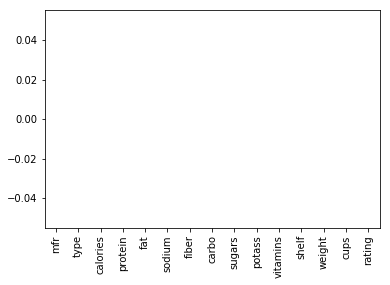

In [7]:
data.isnull().sum().plot(kind='bar')

# Feature Engineering 2 - Handle Categorical features

    - Here see that there are two categorical features in the dataset; 'mfr' and 'type'
    - We first check the different values these features have and then decide which encoding to use


C:\MachineLearning\anaconda\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)
C:\MachineLearning\anaconda\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


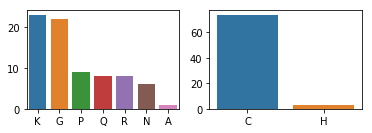

In [8]:
import seaborn as sns

plt.plot([1,2,3])
plt.subplot(221)
mfr_counts = data['mfr'].value_counts()
sns.barplot(mfr_counts.index, mfr_counts.values)

plt.subplot(222)
type_counts = data ['type'].value_counts()
sns.barplot(type_counts.index, type_counts.values)

## Findings:
    - We see that for 'mfr' feature most datapoints/cereals have a value of K & G
    - We will go ahead and dummy encode the mfr feature
    
    - We see that for 'type' feature all datapoints have either a value of C or H
    - We can simply replace C with 0 and H with 1

In [9]:
encoded_mfr = pd.get_dummies(data['mfr'], prefix='mfr', prefix_sep='_')
encoded_mfr_df = pd.DataFrame(data=encoded_mfr)
encoded_mfr_df.head()

encoded_data = pd.concat([data, encoded_mfr_df],axis=1)
encoded_data = encoded_data.drop(['mfr'],axis=1)

encoded_data['type'] = encoded_data['type'].replace('C',0)
encoded_data['type'] = encoded_data['type'].replace('H',0)

encoded_data.head(5)

,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,...,weight,cups,rating,mfr_A,mfr_G,mfr_K,mfr_N,mfr_P,mfr_Q,mfr_R
0,0,70,4,1,130,10.0,5.0,6,280,25,...,1.0,0.33,68.402973,0,0,0,1,0,0,0
1,0,120,3,5,15,2.0,8.0,8,135,0,...,1.0,1.00,33.983679,0,0,0,0,0,1,0
2,0,70,4,1,260,9.0,7.0,5,320,25,...,1.0,0.33,59.425505,0,0,1,0,0,0,0
3,0,50,4,0,140,14.0,8.0,0,330,25,...,1.0,0.50,93.704912,0,0,1,0,0,0,0
4,0,110,2,2,200,1.0,14.0,8,-1,25,...,1.0,0.75,34.384843,0,0,0,0,0,0,1


# Feature Engineering 3 - Scaling Data

    - We can see that some of the features need to be scaled as their values vary a lot and are not consistent


In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

#cols_to_scale = ['calories','protein','fat','sodium','fiber','carbo','potass','vitamins','cups','shelf']
partial_scaled_data = scaler.fit_transform(encoded_data[['sugars','calories','protein','fat','sodium','fiber','carbo','potass','vitamins','cups','shelf','rating']])
partial_scaled_data_df = pd.DataFrame(data=partial_scaled_data, columns=['sugars','calories','protein','fat','sodium','fiber','carbo','potass','vitamins','cups','shelf','rating'])

#remove unencoded values from the dataframe
encoded_data = encoded_data.drop(['sugars','calories','protein','fat','sodium','fiber','carbo','potass','vitamins','cups','shelf','rating'],axis=1)
scaled_data = pd.concat([encoded_data, partial_scaled_data_df],axis=1)
scaled_data.head(5)

C:\MachineLearning\anaconda\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\MachineLearning\anaconda\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


,type,weight,mfr_A,mfr_G,mfr_K,mfr_N,mfr_P,mfr_Q,mfr_R,sugars,...,protein,fat,sodium,fiber,carbo,potass,vitamins,cups,shelf,rating
0,0,1.0,0,0,0,1,0,0,0,-0.208807,...,1.337319,-0.012988,-0.356306,3.314439,-2.257639,2.596948,-0.14627,-2.123870,0.957813,1.844202
1,0,1.0,0,0,0,0,0,1,0,0.244099,...,0.417912,3.987349,-1.737087,-0.064172,-1.551936,0.549573,-1.27255,0.774053,0.957813,-0.622110
2,0,1.0,0,0,1,0,0,0,0,-0.435260,...,1.337319,-0.012988,1.204578,2.892113,-1.787170,3.161741,-0.14627,-2.123870,0.957813,1.200922
3,0,1.0,0,0,1,0,0,0,0,-1.567525,...,1.337319,-1.013072,-0.236238,5.003745,-1.551936,3.302939,-0.14627,-1.388576,0.957813,3.657211
4,0,1.0,0,0,0,0,0,0,1,0.244099,...,-0.501495,0.987096,0.484170,-0.486498,-0.140530,-1.370723,-0.14627,-0.307262,0.957813,-0.593365


# 1) KMeans Clustering (k=3,4,5,6,7,8)

    - Here we will cluster the data into multiple clusters 3,4,5,6,7,8
    - We plot data distribution across clusters and measure the Silhouette score
    - Silhouette score ranges from -1 to 1 with a higher value indicating better clustering
    - Good read at https://en.wikipedia.org/wiki/Silhouette_(clustering)

## Evaluate our KMeans model

    - There are two metrics which we would be using
    - Inertia & Silhoutte score - for different values of cluster counts
    - Lower values of Inertia represents a good fit (Inertia is sum of squared difference b/w each point and it's centroid)
    - Higher values of Silhoutte score represents a good fit
    
    - After running the code we see that the data is best clustered in 6 clusters
    
    - Note: KMeans is suspectible to randomness. As the random state changes the clustering outcome will change as well. One of the ways to deal with is to do 'n' number of initializations; this is specified by n_init parameter

In [14]:
import datetime
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

clusters = [2,3,4,5,6,7,8]
kmeans_silhoutte_scores = []
kmeans_inertia_scores = []

tic = datetime.datetime.now()

for cluster in clusters:
    
    kMeans = KMeans(n_clusters=cluster, precompute_distances=False, init='k-means++', n_init=100, random_state=100)
    model = kMeans.fit(scaled_data)
    model_clusters = model.transform(scaled_data)

    kmeans_silhoutte_scores.append(silhouette_score(scaled_data, model.labels_))
    kmeans_inertia_scores.append(model.inertia_)

toc = datetime.datetime.now()
print ('Training completed in %s seconds'%(toc-tic))

Training completed in 0:00:01.535800 seconds


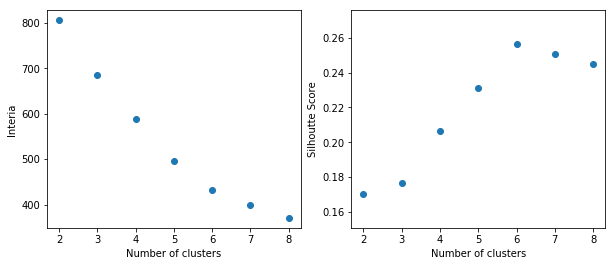

In [15]:
plt.figure(figsize=(10,4))
plt.subplots_adjust()

plt.subplot(121)
plt.scatter(x=clusters, y=kmeans_inertia_scores)
plt.xlabel('Number of clusters')
plt.ylabel('Interia')

plt.subplot(122)
plt.scatter(x=clusters, y=kmeans_silhoutte_scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhoutte Score')

plt.show()

# Summary on  Number Of Clusters

    - We see that betwen K=3 and K=5, K=5 gives better clustering results.
    
    - Inertia score for  both 5 & 6 clusters follows a nice elbow model
    - Silhoutte score for 6 clusters is more than the silhoutte score for 5 clusters.
    - So arguably we can choose either 5 or 6 clusters.
    - In context of assignment I am choosing 5 clusters
        
    - Very good tutorial available at https://www.youtube.com/watch?v=7Qv0cmJ6FsI

# Visualizing Cluster Profiles

    - Create final model with 5 clusters; generate labels and cluster centroids
    - To validate the the clustering profile we would have reduce the data from 26 dimentions to 2 dimension so that we can see the clustering.
    - We first try with PCA to see if the two principal components can represent data in 2 dimension then
    - We try t-SNE to make our data 2 dimensional
    - We find the important features which impact Rating of cereal and plot clusters w.r.t those features

### Find Labels, Cluster Centers for K=5

In [39]:
finalKMeans = KMeans(n_clusters=5, precompute_distances=False, init='k-means++', n_init=100, random_state=100)
finalModel = finalKMeans.fit(scaled_data)
kMeansClusters = finalModel.predict(scaled_data)

### Approach 1 - Dimension reduction using PCA (Principal Component Analysis)

    - We would now see if we can reduce the dimension of the above dataset.
    - Unfortunately the combined explained variance for 2 principal components is not good enough, hence we cannot proceed with PCA

Explained variance for each component is  [0.28326151 0.20801409 0.13429615]


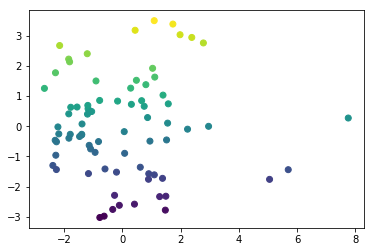

In [17]:
from sklearn.decomposition import PCA

z = PCA(n_components=3)
pca_model = z.fit(scaled_data)
pca_components = pca_model.transform(scaled_data)

print ('Explained variance for each component is ', pca_model.explained_variance_ratio_)
plt.scatter(pca_components[:,0], pca_components[:,1], c=pca_components[:,1])

Explained variance for each component is  [0.28326151 0.20801409]


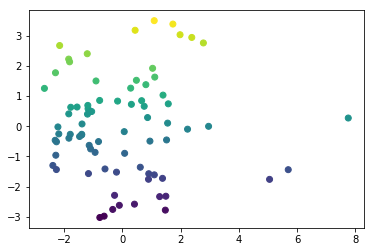

In [18]:
from sklearn.decomposition import PCA

z = PCA(n_components=2)
pca_model = z.fit(scaled_data)
pca_components = pca_model.transform(scaled_data)

print ('Explained variance for each component is ', pca_model.explained_variance_ratio_)
plt.scatter(pca_components[:,0], pca_components[:,1], c=pca_components[:,1])

### Approach 2 - Dimension reduction using t-SNE

[0 3 0 0 1 1 1 3 4 3 1 4 1 3 1 4 4 1 1 3 2 4 3 4 1 1 2 3 3 1 1 1 3 3 3 1 1
 1 4 3 4 3 1 2 3 3 3 4 1 3 4 3 3 4 2 2 3 2 3 3 2 4 4 2 2 2 1 4 2 4 3 4 4 1
 4 4 1]


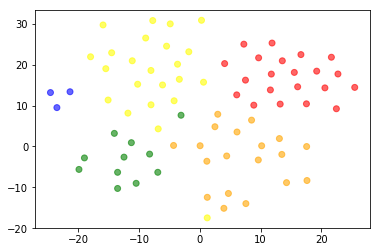

In [19]:
from sklearn.manifold import TSNE
import matplotlib.colors

tsne = TSNE()
results_tsne = tsne.fit_transform(scaled_data)

color_list = ['blue','red','green','yellow','orange']
cluster_values = sorted(finalModel.labels_)

print (finalModel.labels_)
cmap = matplotlib.colors.LinearSegmentedColormap.from_list(cluster_values, color_list)

plt.scatter(results_tsne[:,0], results_tsne[:,1],
    c=finalModel.labels_,
    cmap=cmap, 
    alpha=0.6, 
    )

### Approach 3 - Finding Important Features

    - One of the ways we can find important features for this dataset is to plot a HeatMap which would show corerelation between each feature
    - After plotting the heatmap we see that Protein and Sodium features have maximum corelation with Rating

Index(['type', 'weight', 'mfr_A', 'mfr_G', 'mfr_K', 'mfr_N', 'mfr_P', 'mfr_Q',
       'mfr_R', 'sugars', 'calories', 'protein', 'fat', 'sodium', 'fiber',
       'carbo', 'potass', 'vitamins', 'cups', 'shelf', 'rating'],
      dtype='object')


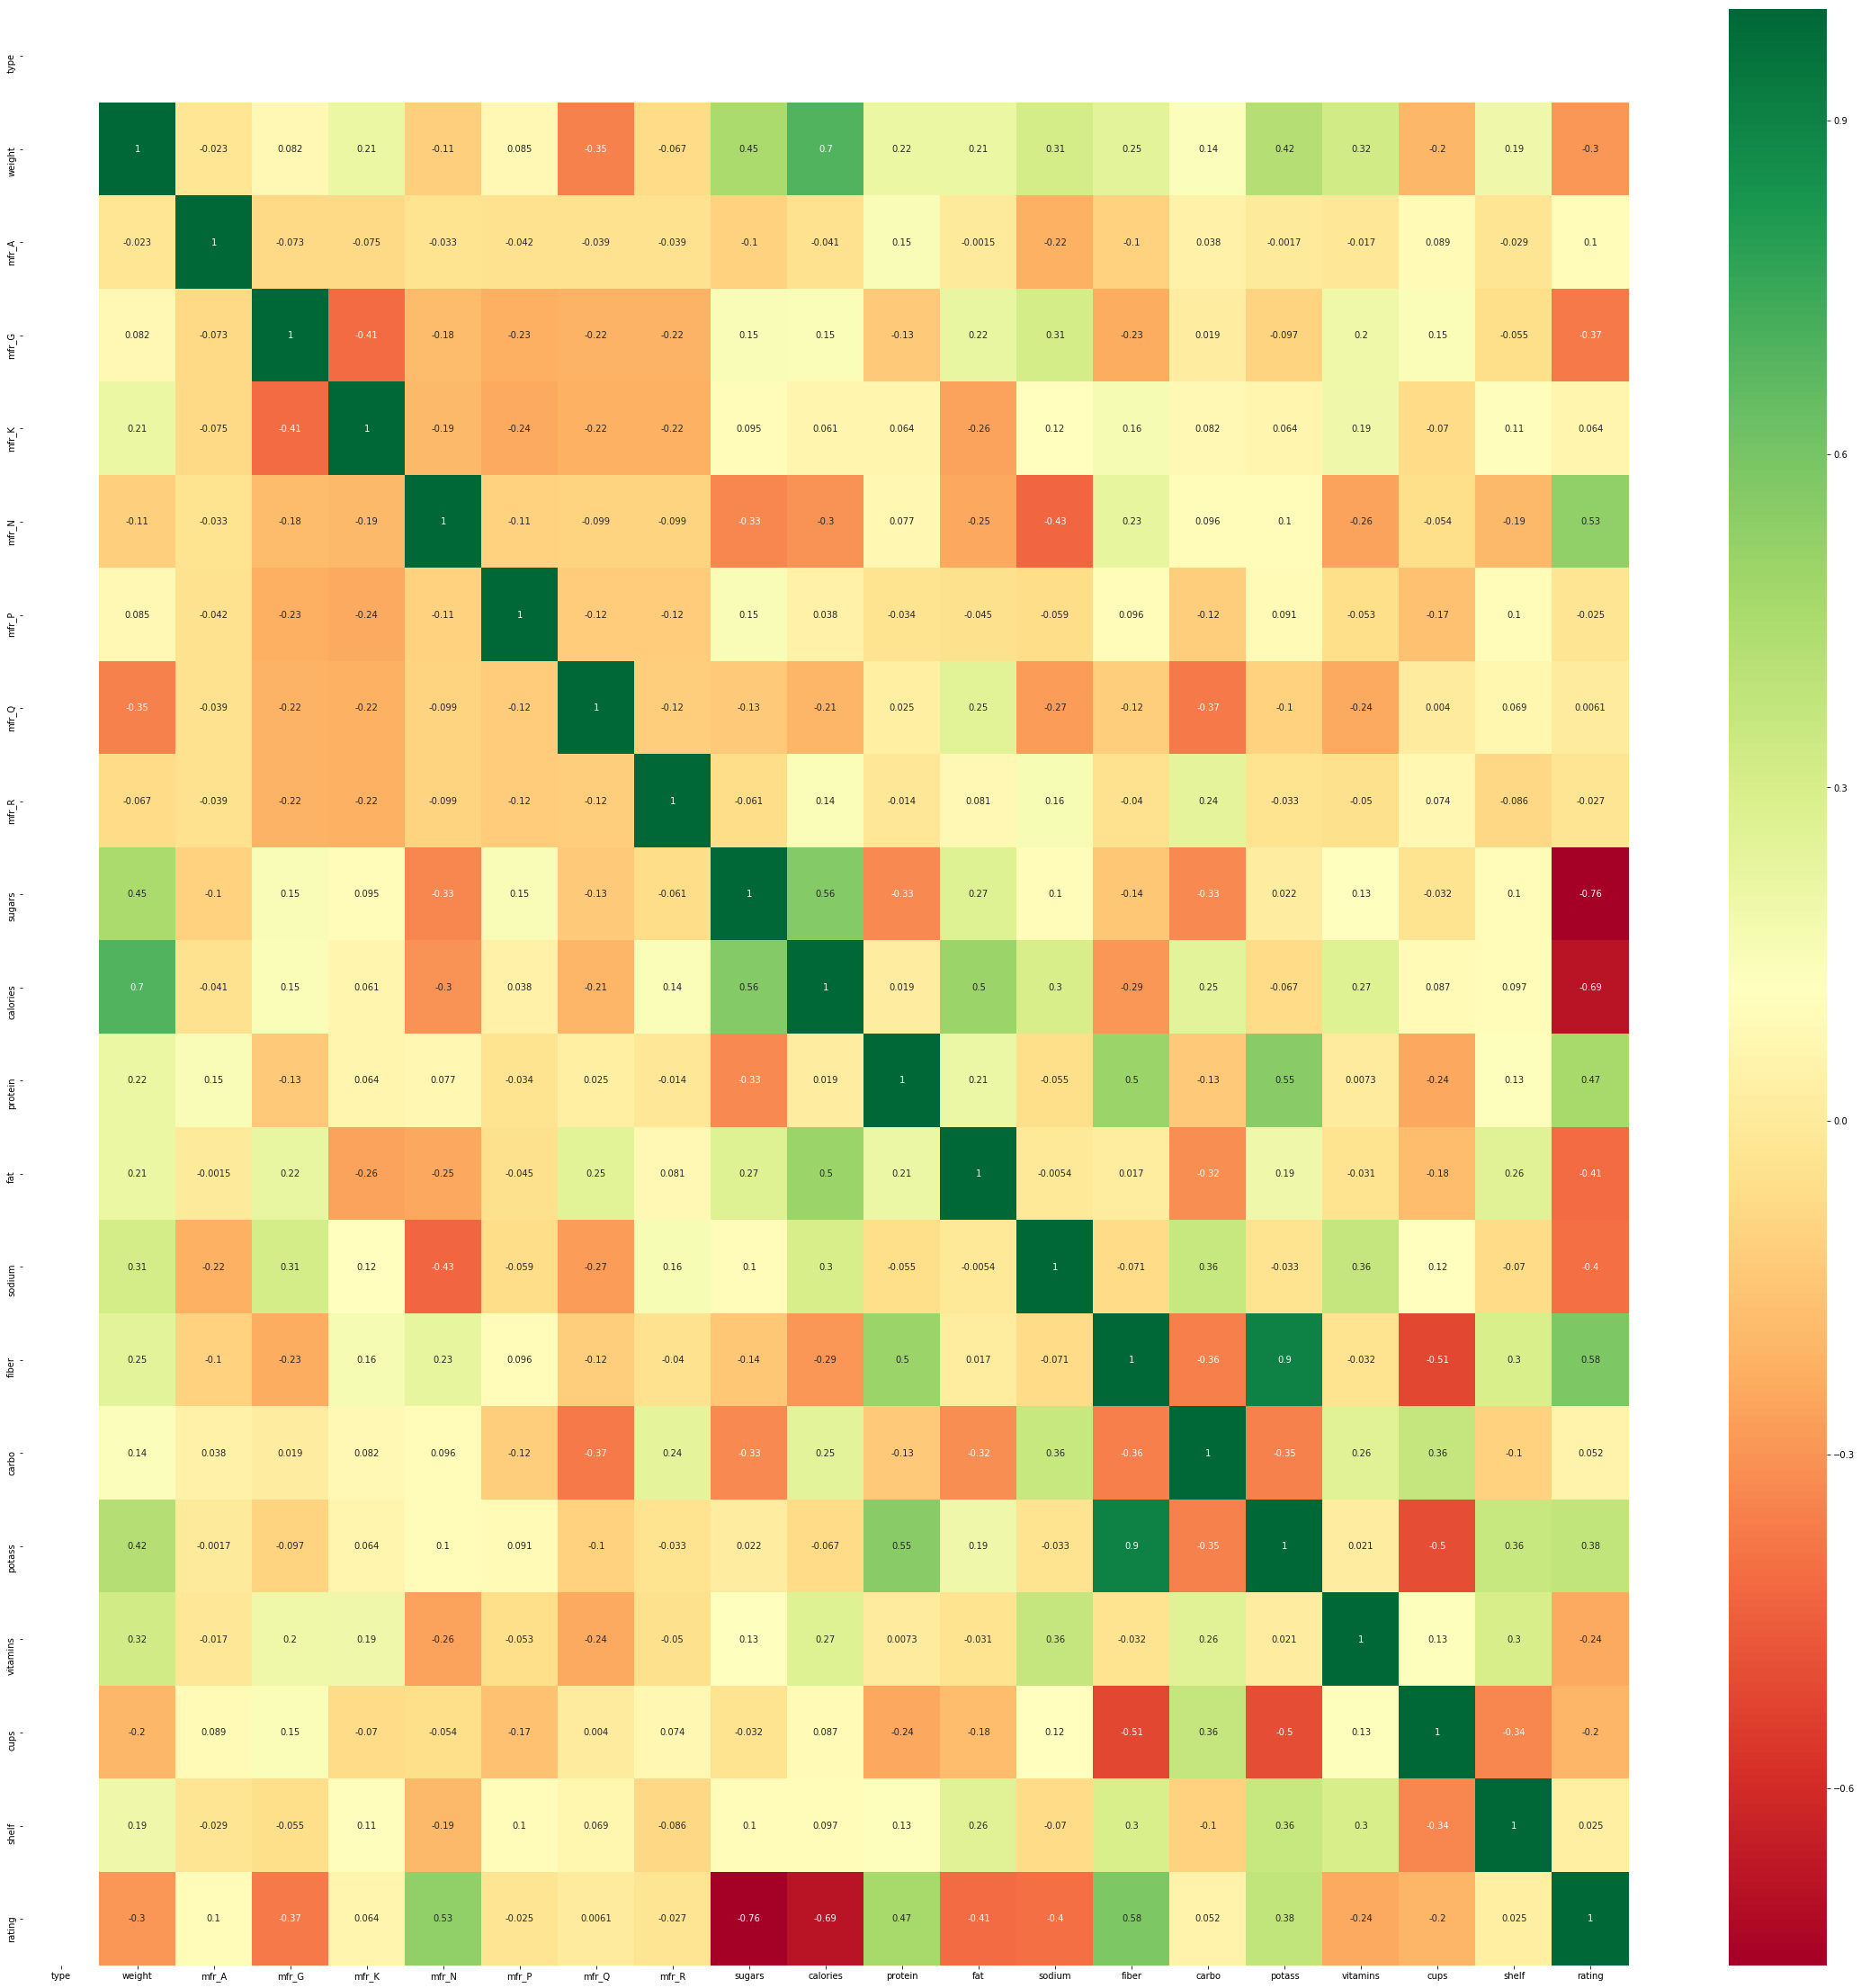

In [28]:
corelation_matrix = scaled_data.corr()
top_corelation_features = corelation_matrix.index
plt.figure(figsize=(40,40))
g = sns.heatmap(scaled_data[top_corelation_features].corr(), annot=True, cmap='RdYlGn')
print (top_corelation_features)

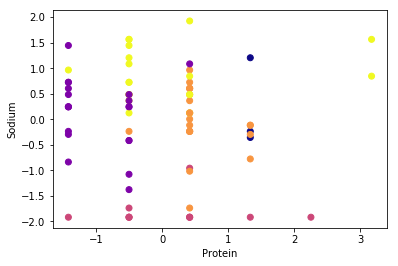

In [40]:
# plot the cluster assignments
plt.scatter(scaled_data['protein'], scaled_data['sodium'], c=kMeansClusters, cmap="plasma")
plt.xlabel("Protein")
plt.ylabel("Sodium")
plt.show()

# Ratings Predictions

    - Approach 1: We can depict a histogram for Ratings grouped by Clusters.
    - Approach 2: We can build a simple classifier on Ratings & Cluster to predict cluster for a given rating

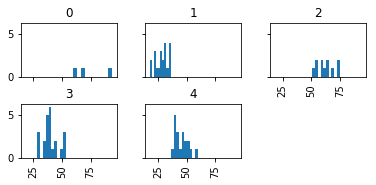

In [20]:
data_orig.head(5)
#print (data_orig['rating'])
data_ratings_predictions = pd.DataFrame()
data_ratings_predictions['rating'] = data_orig['rating']
data_ratings_predictions['cluster'] = finalModel.labels_

data_ratings_predictions['rating'].hist(by=data_ratings_predictions['cluster'], layout=(3,3), sharex=True, sharey=True)
plt.xlabel('Rating')
plt.ylabel('Cluster')
plt.show()

### Rating Summary

    - A Cereal with 0 < Rating  <30 has high chances of being in Cluster 1
    - A Cereal with 50 < Rating < 75  has high chances of being in Cluster 2
    - A Cereal with 25 < Rating < 50  has high chances of being in Cluster 3
    - A Cereal with 40 < Rating < 60  has high chances of being in Cluster 4
    - A Cereal with 70 < Rating has high chances of being in Cluster 0

## DBSCAN based clustering

    - Some highlights about DBSCAN clustering extracted from the book:
    - does not require the user to set the number of clusters a priori
    - can capture clusters of complex shapes
    - can identify points that are not part of any cluster (very useful as outliers detector)
    - works by identifying points that are in crowded regions of the feature space, where many data points are close together (dense regions in feature space)
    - There are two parameters in DBSCAN: min_samples and eps
    - If there are at least min_samples many data points within a distance of eps to a given data point, that data point is classified as a core sample
core samples that are closer to each other than the distance eps are put into the same cluster by DBSCAN


In [71]:
from sklearn.cluster import DBSCAN

# cluster the data into five clusters
dbscan = DBSCAN(eps=1.5, min_samples = 3)
dbscanClusters = dbscan.fit_predict(scaled_data)
print (dbscanClusters)

[-1 -1 -1 -1 -1 -1  0 -1 -1 -1 -1 -1 -1 -1  1  2  2  0  1 -1 -1 -1 -1 -1
  0 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  2  2 -1 -1 -1  0 -1 -1 -1 -1 -1
 -1  1 -1 -1 -1]


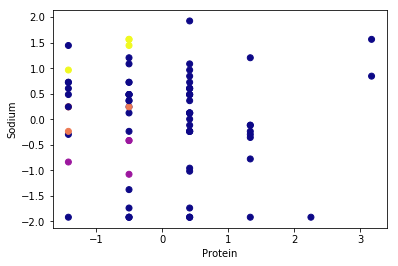

In [72]:
# plot the cluster assignments
plt.scatter(scaled_data['protein'], scaled_data['sodium'], c=dbscanClusters, cmap="plasma")
plt.xlabel("Protein")
plt.ylabel("Sodium")
plt.show()